In [1]:
from torchvision import models

In [70]:
resnet = models.resnet101(pretrained=True)

In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### pre deeal with this photos

In [6]:
from torchvision import transforms
prepress = transforms.Compose([
    transforms.Resize(256),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485,0.456,0.406],
    std=[0.229,0.224,0.225]
    )
])

In [7]:
prepress

Compose(
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    Resize(size=224, interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [20]:
from PIL import Image
im_path="/Users/liujingmao/Downloads/pytorchproject/pytorchproject/data/1/"

In [55]:
img=Image.open("/Users/liujingmao/Downloads/pytorchproject/pytorchproject/data/1/dog2.jpg")

show the img

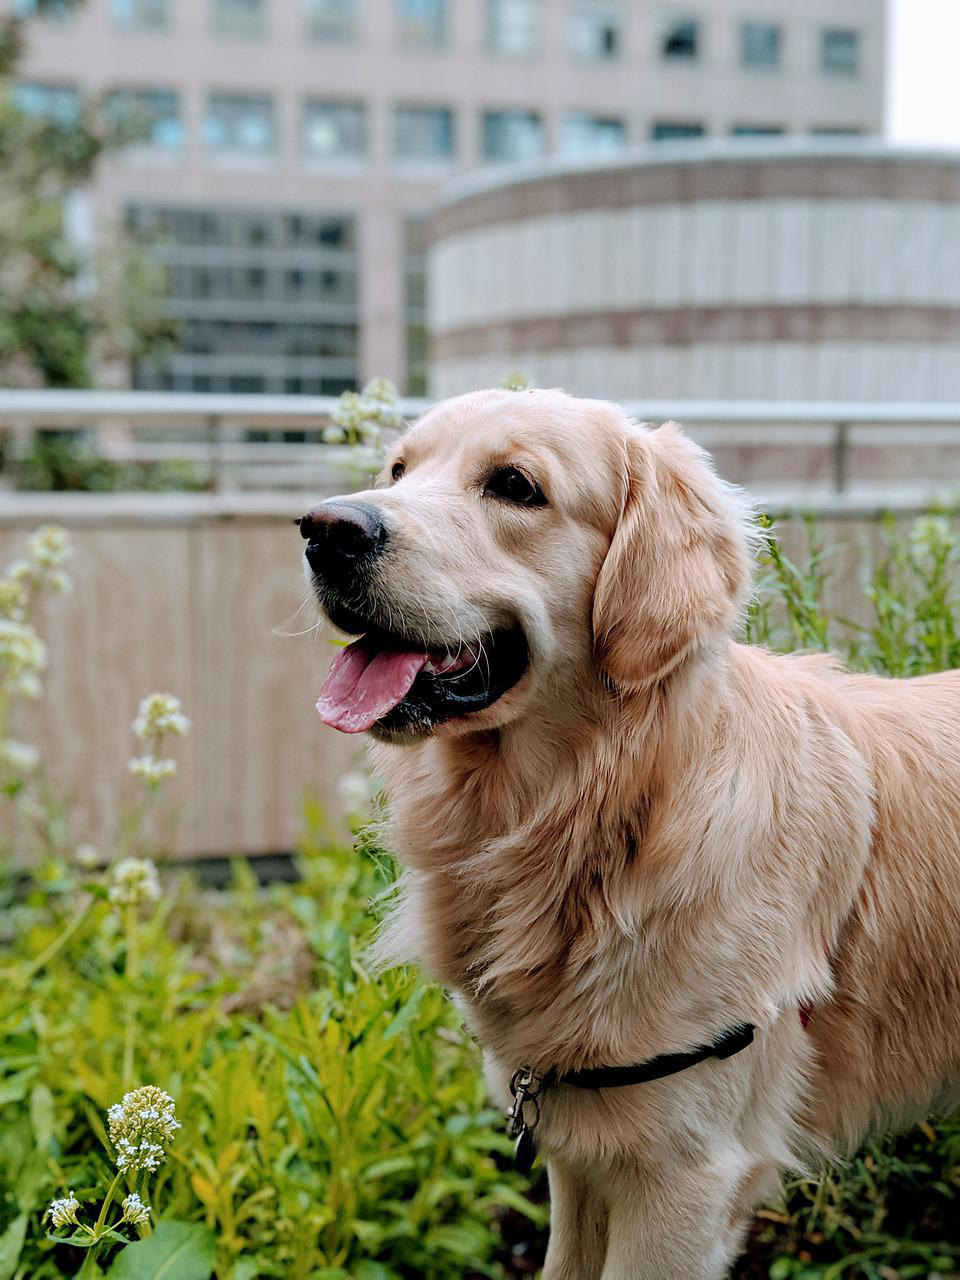

In [56]:
img

In [57]:
img_t = prepress(img)

In [58]:
import torch


In [59]:
batch_t = torch.unsqueeze(img_t,0)

In [60]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [61]:
out = resnet(batch_t)

In [62]:
out

tensor([[-1.9500e+00, -1.1786e+00, -2.4899e+00, -3.8635e+00, -3.0771e+00,
         -2.7552e+00, -3.3913e+00, -1.2857e+00,  1.3642e-01, -3.1082e+00,
         -1.2755e+00, -5.3573e-01, -3.1204e-01, -2.0020e+00, -2.3931e-01,
         -2.0655e+00, -1.6340e+00,  2.7651e-01, -7.7831e-01, -6.7769e-01,
         -2.9783e+00, -1.9479e+00, -1.4773e+00, -3.7989e-01, -4.6577e-01,
         -7.2431e-01, -1.6130e+00, -1.1387e+00, -6.4835e-01, -1.9951e+00,
         -1.6245e+00, -1.9861e+00, -1.7976e+00, -2.6100e+00, -1.6674e+00,
         -1.7049e+00,  2.1109e-01,  5.0377e-02, -8.3373e-01, -2.3687e-01,
         -3.8503e-01,  5.2386e-01, -1.0693e-01, -1.6632e+00,  1.4086e-01,
         -2.0402e+00,  9.7852e-01, -1.3146e+00, -2.5789e+00, -1.4827e+00,
         -7.4654e-01, -1.1662e+00,  1.9179e-02, -1.0695e+00, -1.2307e+00,
         -9.7441e-01, -2.7495e-01, -5.8536e-01, -2.1683e+00, -3.8566e-01,
          3.6020e-01, -1.7339e+00, -9.4028e-01, -1.3164e+00, -2.0096e+00,
         -1.9586e+00, -2.1824e+00, -7.

每次不一样,概率可能的值

In [63]:
with open('/Users/liujingmao/Downloads/pytorchproject/pytorchproject/data/1/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [64]:
_, index = torch.max(out, 1)

In [65]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100

In [66]:
labels[index[0]], percentage[index[0]].item()

('golden retriever', 84.08644104003906)

In [67]:
_, indices = torch.sort(out, descending=True)

In [68]:
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 84.08644104003906),
 ('Labrador retriever', 1.798004150390625),
 ('cocker spaniel, English cocker spaniel, cocker', 1.4157084226608276),
 ('Norfolk terrier', 0.5340202450752258),
 ('tennis ball', 0.4600520133972168)]